In [ ]:
from bokeh.plotting import ColumnDataSource, figure, output_file, save, show
from bokeh.models import LinearColorMapper, Span
from bokeh.resources import INLINE

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl
import pandas as pd
import numpy as np
import spacy

from scipy.stats import skew, kurtosis, mode, variation

from bokeh.resources import INLINE
import bokeh.io
from bokeh.io import export_svg
from bokeh import *
bokeh.io.output_notebook(INLINE)


In [2]:
MODEL_PATH = "../models/ATT2ITM/restaurants/newyorkcity/8b74c00371d98f236fb265dd46b234c4"; nlp = spacy.load("en_core_web_sm")
MODEL_PATH = "../models/ATT2ITM/restaurants/barcelona/a751af910be5e885fa3470532027da52"; nlp = spacy.load("es_core_news_sm")
MODEL_PATH = "../models/ATT2ITM/restaurants/paris/93b1f31e2c35a560da30ecd7415f755e"; nlp = spacy.load("fr_core_news_sm")
MODEL_PATH = "../models/ATT2ITM/restaurants/gijon/544d98b3ba0a0dfd7e3f0019f4d9675e"; nlp = spacy.load("es_core_news_sm")

#MODEL_PATH = "../models/ATT2ITM/restaurants/newyorkcity/46d9c1e129b12355437745c892245068"

# MODEL_PATH = "../models/ATT2ITM/restaurants/gijon/d82d6240faab8b80d1c3afc1031c500f"; nlp = spacy.load("es_core_news_sm")
# MODEL_PATH = "../models/ATT2ITM/restaurants/barcelona/07b5575b994a0eb9851a56ab25cb31ac"; nlp = spacy.load("es_core_news_sm")

MODEL_PATH = "../models/ATT2ITM/amazon/fashion/1badd2185814e515e43609bc6b2c13ae"; nlp = spacy.load("en_core_web_sm")

with open(MODEL_PATH + '/all_att.pkl','rb') as f: all_att = pkl.load(f)
with open(MODEL_PATH + '/word_names.pkl','rb') as f: word_names = pkl.load(f)

In [3]:
print(all_att.min(), all_att.mean(), all_att.max())

-1.0 -0.4656 1.0


In [5]:
att_mean = np.mean(all_att, -1)
att_std = np.std(all_att, -1)

n_bins = 3 + 1
bins = [-1, -.01, .01, 1]# np.linspace(-1, 1, n_bins)
histograms = np.apply_along_axis(lambda x: np.histogram(x, bins=bins)[0], 1, all_att)
histograms = histograms/all_att.shape[1]

x_val = att_mean # skew(all_att,-1)
y_val = att_std

pctl_y = np.percentile(y_val,10)
pctl_x = np.percentile(x_val,80)
print(pctl_x, pctl_y)

att_mean_std = np.abs(att_mean) + att_std
all_std_pct = np.argsort(-att_std)[:int(len(att_std) * .10)]

# Hacer un gráfico 2d pintando, para cada palabra, media y std
# colors = y_val.copy() # att_mean_std
# colors[np.where((x_val<pctl_x) & (y_val<pctl_y))]=-1
# colors[np.where(y_val<pctl_y)]=-1

'''
colors = np.sum(np.abs(all_att), -1)
colors = (colors-colors.min())/ (colors.max()-colors.min())
color_pct = np.percentile(colors, 20)
print(color_pct)
colors[np.where(colors<color_pct)]=0
'''

colors = histograms[:,1]
# colors[np.where(colors>.95)]=2

# Versión dinámica
source_w = ColumnDataSource(data=dict(x=x_val, y=y_val, desc=word_names, col=colors))
TOOLTIPS = [("Name", "@desc"),("X", "@x"),("Y", "@y"),("Color", "@col")]
p = figure(width=1200, height=500, tooltips=TOOLTIPS, output_backend="svg")

lc = LinearColorMapper(palette="Magma256", low=min(colors), high=max(colors))
p.scatter('x', 'y', size=5, source=source_w, line_color=None, fill_color={"field": "col", "transform": lc})

p.xaxis.axis_label = 'X'
p.yaxis.axis_label = 'Y'
# Vertical & Horizontal lines
# output_file("asd.html")
# export_svg(p, filename="plot.svg")
show(p)


-0.16840820312499993 0.214501953125


### Dibujar distribución de cada palabra de una frase

'\nplot_phrase_dist("a an the and of")\nplot_phrase_dist("i you he she it they we")\nplot_phrase_dist("good bad average worst best")\nplot_phrase_dist("hey hi hello welcome")\nplot_phrase_dist("nothing nowhere nobody never no")\nplot_phrase_dist("pizza pasta pastrami hotdog")\n'

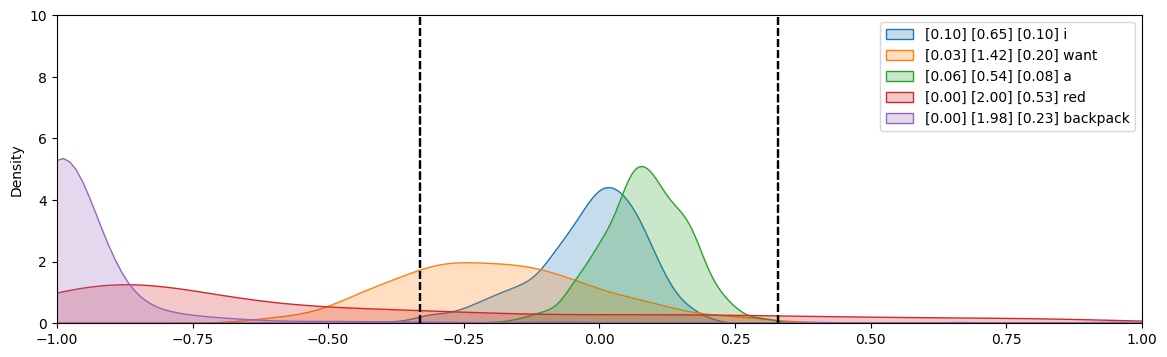

In [7]:
def plot_phrase_dist(words="i want fresh pizza"):
    plt.figure(figsize=(14,4))

    for word in words.split(" "):
        word_id = np.argwhere(np.array(word_names) == word)[0][0]
        word_data = all_att[word_id, :]

        # print(np.mean(word_data), np.std(word_data), skew(word_data), kurtosis(word_data))

        sns.kdeplot(x=word_data, fill=True, label=f"[{colors[word_id]:0.2f}] [{np.ptp(word_data):0.2f}] [{np.std(word_data):0.2f}] {word}")
        # sns.histplot(x=word_data, label=word, bins=np.linspace(-1, 1, 12))
        plt.xlim(-1, 1)
        plt.ylim(0, 10)

        plt.axvline(x=-0.33, color='black', linestyle='--')
        plt.axvline(x=0.33, color='black', linestyle='--')

    plt.legend()

# plot_phrase_dist("je sui service plat cuisine pizza")
# plot_phrase_dist("querer comer arroz bogavante y con buena vista")
# plot_phrase_dist("querer comer nutella en sibuya o crivencar")

plot_phrase_dist("i want a red backpack")


'''
plot_phrase_dist("a an the and of")
plot_phrase_dist("i you he she it they we")
plot_phrase_dist("good bad average worst best")
plot_phrase_dist("hey hi hello welcome")
plot_phrase_dist("nothing nowhere nobody never no")
plot_phrase_dist("pizza pasta pastrami hotdog")
'''



<AxesSubplot:ylabel='Count'>

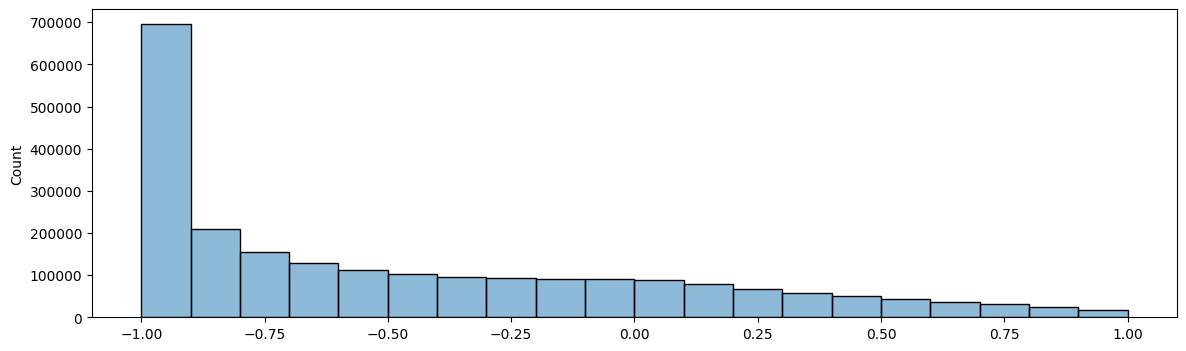

In [8]:
plt.figure(figsize=(14,4))
sns.histplot(x=np.concatenate(all_att), bins=20, kde=True)

In [15]:
df = pd.DataFrame(all_att.round(1).T, columns=word_names, dtype=np.float16)

In [168]:
word = "they"
id_wrd = np.argwhere(np.asarray(word_names)==word)[0][0]
print(word, id_wrd, x_val[id_wrd], y_val[id_wrd], colors[id_wrd])

they 11881 0.04998779296875 0.013405 1.0


In [ ]:
colors = y_val # att_mean_std
colors[np.where(colors<pctl)]


In [6]:
words = ["want", "beer", "pizza", "pasta", "wine", "paella", "price", "fresh", "i", "food", "lunch", "dinner", "u", "nice", "staff", "slope", "loop", "wife"]
words = ["wife", "staff", "waiter", "waitress", "friend", "boss", "husband", "child"]
words = ["beer", "wine", "water", "drink", "coffee"]
words = ["i", "want", "u", "you", "her", "his", "mine", "at", "eat"]
words = ["eat"]

words = ["albondigas", "antique", "aperol", "apetizer", "apple", "apricot", "aqua", "argentina", "argentine", "argentinian", "aroma", "aromatic", "arroz", "asada", "asado", "asian", "asparagus", "astonish", "astonishing", "astonishingly", "ate", "attractive", "atypical", "aussie", "australian", "austrian", "authentic", "beef", "beer", "best", "bit", "burguer", "burrata", "burratta", "burrito", "burritos", "carry", "casa", "casablanca", "cassoulet", "catering", "cauliflower", "cava", "cecina", "cerviche", "cesar", "champagne", "chardonnay", "cheap", "cheaply", "cheddar", "cheery", "cheesburger", "cheescake", "cheese", "cheeseburger", "cheesecake", "chicharron", "chicken", "chorizo", "cider", "cocina", "cocktail", "coco", "cocoa", "coffe", "coffee", "coke", "consistency", "dinner", "engaging", "error", "fajita", "falafel", "food", "full", "garlic", "genuine", "good", "hamburguer", "impressed", "jam", "jamon", "kindly", "macadamia", "macchiato", "margarita", "margerita", "marinated", "mariniere", "mariscada", "meat", "nacho", "nachos", "offer", "overdone", "paella", "pastas", "pastel", "pastor", "patata", "peanut", "penne", "pita", "preparation", "pretty", "quiche", "quinoa", "restuarant", "resturaunt", "sandwhiche", "scallopine", "scallopini", "scaloppine", "scaloppini", "serious", "steak", "stellar", "stracciatella", "tempting", "texture", "unusual", "vinegar", "vodka", "water", "wet", "wine", "autumn", "aux", "cellphone", "ceo", "½", "a", "aaa", "aaron", "able", "ac", "actually", "ad", "ag", "ah", "ai", "al", "already", "am", "an", "ant", "anti", "any", "aoc", "ap", "apt", "ar", "around", "as", "at", "au", "av", "az", "b", "ba", "bb", "bc", "bd", "be", "become", "bf", "bg", "bi", "bistrotbagatelle", "bk", "bo", "br", "bring", "bs", "bu", "by", "c", "ca", "cc", "cd", "cg", "chicago", "cm", "co", "completely", "contain", "cp", "ct", "d", "da", "db", "dc", "dd", "de", "decide", "dh", "di", "discuss", "dj", "do", "dr", "ds", "du", "e", "ea", "ed", "eg", "eh", "either", "ej", "el", "ellensstardustdiner", "else", "em", "en", "end", "enthusiastically", "er", "es", "et", "ew", "ex", "f", "fake", "fal", "fb", "fe", "ff", "fi", "find", "first", "fl", "fo", "forever", "fr", "ft", "fu", "g", "ga", "gf", "give", "gk", "gm", "go", "gr", "gt", "h", "ha", "having", "hb", "he", "hh", "hi", "hk", "ho", "hr", "hu", "i", "ia", "ie", "if", "ii", "il", "in", "inch", "ir", "it", "itself", "iv", "j", "je", "jg", "jo", "jp", "jr", "ju", "jw", "k", "ka", "kc", "ko", "l", "la", "lb", "le", "lend", "li", "ll", "lo", "lt", "m", "ma", "may", "my", "n", "na", "nada", "nah", "now", "o", "october", "on", "other", "p", "planethollywoodintl", "playwrightcelticpubnyc", "q", "r", "really", "reason", "s", "should", "since", "someone", "t", "talk", "th", "their", "third", "this", "though", "u", "v", "very", "w", "what", "whatever", "when", "why", "x", "y", "year", "z", "about", "above", "abroad", "accordingly", "across", "after", "afterwards", "again", "against", "ago", "ahead", "all", "allow", "almost", "alone", "along", "alongside", "also", "although", "always", "amid", "amidst", "among", "amongst", "and", "another", "anybody", "anyhow", "anyone", "anything", "anyway", "anyways", "anywhere", "apart", "appear", "appreciate", "appropriate", "are", "aside", "ask", "asking", "available", "away", "awfully", "back", "backwards", "act", "added", "amount", "announce", "anymore", "apparently", "approximately", "aren", "arise", "became", "because", "been", "before", "beforehand", "begin", "beginning", "behind", "being", "believe", "below", "beside", "besides", "better", "between", "beyond", "bill", "both", "bottom", "brief", "briefly", "but", "call", "came", "can", "cause", "certain", "certainly", "clearly", "com", "come", "comes", "computer", "con", "consequently", "consider", "considering", "could", "course", "cry", "currently", "dare", "date", "definitely", "describe", "despite", "detail", "different", "directly", "done", "down", "due", "during", "each", "effect", "eight", "eighty", "eleven", "elsewhere", "empty", "ending", "enough", "entirely", "especially", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "exactly", "example", "except", "fairly", "far", "few", "fifteen", "fifth", "fifty", "fill", "fire", "five", "fix", "following", "for", "former", "formerly", "forth", "forty", "forward", "found", "four", "from", "front", "further", "furthermore", "gave", "get", "gets", "getting", "going", "got", "had", "half", "hardly", "have", "hello", "help", "hence", "her", "here", "hers", "herself", "himself", "his", "home", "hopefully", "how", "however", "hundred", "immediate", "immediately", "importance", "important", "inc", "indeed", "indicate", "information", "inner", "inside", "instead", "interest", "into", "invention", "its", "just", "keep", "know", "known", "largely", "last", "lately", "later", "latter", "least", "less", "lest", "let", "lets", "like", "likely", "likewise", "line", "little", "look", "looking", "looks", "low", "lower", "made", "mainly", "make", "many", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "might", "mill", "million", "mine", "minus", "miss", "ml", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "much", "mug", "must", "myself", "name", "namely", "nd", "near", "nearly", "necessarily", "necessary", "need", "neither", "never", "nevertheless", "new", "next", "nine", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "not", "nothing", "notwithstanding", "novel", "nowhere", "obtain", "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "once", "one", "only", "onto", "opposite", "or", "otherwise", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "own", "page", "part", "particular", "particularly", "past", "per", "perhaps", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "put", "que", "quickly", "quite", "rather", "rd", "re", "readily", "reasonably", "recent", "recently", "regardless", "related", "relatively", "research", "respectively", "right", "round", "run", "same", "saw", "say", "saying", "sec", "second", "secondly", "section", "see", "seeing", "seem", "self", "sensible", "seriously", "seven", "several", "shall", "she", "shed", "show", "side", "significant", "significantly", "similar", "similarly", "sincere", "six", "sixty", "slightly", "so", "some", "somebody", "someday", "somehow", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specify", "state", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sure", "system", "take", "taking", "tell", "ten", "than", "thank", "thanks", "that", "the", "theirs", "themselves", "then", "there", "thereafter", "therefore", "thereof", "these", "they", "thick", "thin", "thing", "think", "thirty", "thorough", "thoroughly", "those", "thou", "thousand", "three", "through", "throughout", "thru", "thus", "til", "till", "tip", "to", "together", "too", "top", "toward", "towards", "tried", "truly", "try", "ts", "twelve", "twenty", "twice", "two", "un", "under", "underneath", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "up", "upon", "upwards", "use", "used", "useful", "usually", "value", "various", "versus", "via", "vs", "want", "way", "we", "wed", "welcome", "well", "went", "whenever", "where", "whereas", "whereby", "wherever", "whether", "which", "whichever", "while", "whilst", "whim", "who", "whoever", "whole", "whom", "whomever", "whose", "widely", "will", "willing", "wish", "with", "within", "without", "wonder", "word", "world", "would", "www", "yes", "yet", "you", "your", "yours", "yourself", "yourselves", "zero"]
# words = ["cumpleaños", "nuez", "poquito", "crema", "comes", "ternero", "ventanal", "festivo", "embutido", "crujiente", "hielo", "bar", "salado", "error", "yogur", "patata", "sorprender", "tardanza", "caliente", "bechamel", "cartar", "recomendo", "entrant", "volveriar", "escaso", "extraordinario", "gijon", "aceite", "pollo", "lata", "tapeo", "chocolate", "asturiano", "ensalada", "natilla", "gratuito", "tierno", "templado", "cava", "cecina", "buenisima", "licor", "rancio", "paella", "merluza", "lechuga", "espectacular", "centrico", "sabroso", "cocido", "sopa", "aceituna", "verdura", "calabacin", "cigala", "caldo", "pesima", "casera", "callo", "lentitud", "cafe", "gratinado", "asequible", "abundante", "bacon", "solomillo", "queso", "gamba", "comodidad", "puerro", "exquisita", "ajillo", "defraudar", "volverar", "pimenton", "regresar", "verde", "mejorcito", "diverso", "majo", "riojo", "postre", "reservo", "cabracho", "pate", "valer", "vinagreta", "ternera", "afluencia", "raro", "abundancia", "besugo", "olvidar", "oli", "hotel", "rosado", "agradar", "tarjeta", "excepcional", "agil", "caramelizado", "amplio", "decorado", "tipica", "bullicioso", "menu", "cumplir", "sangrio", "molestar", "caro", "pesto", "pueblo", "torto", "empanadilla", "lasaña", "groupon", "internacional", "tierra", "combinado", "barril", "plaza", "muchisima", "sandwich", "oviedo", "intento", "canelon", "trabanco", "empanada", "gourmet", "bugre", "parrilla", "brava", "afuera", "franquicia", "cimadevilla", "museo", "masa", "ravioli", "xxl", "estrella", "deva", "viesqu", "punta", "fajita", "perceb", "cachelo", "desayuno", "lasagna", "michelin", "cafeteria", "higado", "creativo", "degustacion", "ribeiro", "thai", "gallego", "jardin", "mojito", "somio", "llagar", "berenjena", "molleja", "rural", "gyoza", "nacho", "puerto", "gepetto", "desayunar", "pasta", "boda", "ceviche", "italia", "pad", "asiatico", "burasari", "yakisoba", "huerta", "camaron", "fusion", "zumo", "argentino", "picaña", "batido", "raxo", "domicilio", "padrino", "hamburguesa", "roast", "tienda", "tropical", "wok", "candela", "nikkei", "joe", "pizzeria", "llavianu", "astur", "beef", "pizza", "pulperia", "andaluz", "mejican", "japon", "coctel", "galana", "crespo", "pondala", "japones", "big", "merendero", "coquina", "italiano", "sibuya", "sushi", "margarita", "perrito", "mexicano", "mejicano", "crivencar", "kausa", "acuario", "manzano", "cueva", "aldo", "peruano", "casino", "paolo", "tonel", "batalla", "agobio", "alguien", "cenir", "cuando", "t", "adjunto", "embargo", "principio", "veniar", "cecinar", "sentado", "orden", "debajo", "piedra", "valorar", "atendiar", "consistiar", "falta", "excepcion", "ofrecido", "responder", "utilizar", "o", "trabajado", "trabajador", "rondar", "servido", "mayoria", "alli", "gestionar", "cabeza", "facilitar", "tanto", "demanda", "pedro", "piel", "bolsa", "quisir", "esmerado", "dudas", "conocer", "e", "mencionar", "quiza", "personalmente", "pagina", "demas", "mover", "genero", "fin", "inmenso", "importante", "recibimos", "volumen", "imagen", "destaco", "supuesto", "mencion", "dispuesto", "aquel", "ahora", "estariar", "igual", "dirigir", "escoger", "amiga", "continuar", "pero", "regalar", "aprovechar", "suceder", "logico", "marca", "leido", "critica", "confirmar", "cual", "caer", "acerca", "referir", "consejo", "honor", "director", "planeta", "habio", "avil", "rocio", "carmar", "proceso"]

words_relevance = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# words_relevance = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# words = set(word_names)-set(words)

inf = []
for word_pos, word in enumerate(words):
    word_loc = np.argwhere(np.array(word_names) == word)
    if len(word_loc)>0:
        word_id = word_loc[0][0]
        word_data = all_att[word_id, :]
        word_relevance = "SI" if words_relevance[word_pos]==1 else "NO"
        data_line = [word]
        data_line.append(nlp(word)[0].pos_)
        data_line.extend(np.histogram(word_data, bins=np.linspace(-1, 1, 6))[0])
        data_line.extend([np.sum(np.abs(word_data)),  np.min(word_data), np.max(word_data), np.max(word_data)-np.min(word_data)])
        data_line.extend([np.median(word_data), np.mean(word_data), mode(word_data)[0][0], np.std(word_data), np.var(word_data), variation(word_data)])
        data_line.extend([skew(word_data), kurtosis(word_data)])
        data_line.extend([np.quantile(word_data,.25), np.quantile(word_data,.5), np.quantile(word_data,.75)])
        data_line.append(word_relevance)
        inf.append(data_line)
    else:
        print(f"La palabra {word} no existe.")
data = pd.DataFrame(inf, columns=["word", "pos", "RG1", "RG2", "RG3", "RG4", "RG5", "sum", "min", "max", "range", "median", "mean", "mode", "std", "var", "var_coef", "skew", "kutosis", "c25", "c50", "c75", "relevance"])

# data["relevance"] = [2]*len(words)# (words)words_relevance


# print(data.to_csv(sep="\t", index=False))
data.to_csv("word_dist_others.csv", index=False)

### Filtrado de palabras por número de valores en cada intervalo de la distribución
#### Describir cada palabra por el número de valores que hay en cada rango
**Por ejemplo:** Se crean 3 rangos [-1, -0.4] [-0.4, 0.4] [0.4, 1] y se cuenta cuantos valores caen en cada uno.

In [9]:
n_bins = 3 + 1
col_names = [f"B{i+1}" for i in range(n_bins-1)]
histograms = np.apply_along_axis(lambda x: np.histogram(x, bins=np.linspace(-1, 1, n_bins))[0], 1, all_att)
km_data = pd.DataFrame(histograms, columns=col_names)
km_data = km_data/all_att.shape[1] # Norm
km_data.insert(0, "word", word_names )
km_data = km_data.iloc[1:,:] # del UNK
print(np.linspace(-1, 1, n_bins))

[-1.         -0.33333333  0.33333333  1.        ]


#### Buscar mejor número de clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
silh = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    preds = kmeans.fit_predict(km_data.iloc[:,1:])
    wcss.append(kmeans.inertia_)
    silh.append(silhouette_score(km_data.iloc[:,1:], preds))

plt.plot(range(2, 11), wcss)
plt.title('Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

plt.plot(range(2, 11), silh)
plt.title('Silhouete')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouete')
plt.show()

#### Hacer el clustering y un TSNE para dibujar en 2D

In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from bokeh.plotting import figure, show

k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans = kmeans.fit(km_data.iloc[:,1:])

dimred = PCA(n_components=2, random_state=0)
new_vals = dimred.fit_transform(km_data.iloc[:,1:])
print(dimred.explained_variance_ratio_)

le = LabelEncoder()
le.fit(kmeans.labels_)
colors = le.transform(kmeans.labels_)
cmap = ListedColormap(['red', 'green', 'blue', 'yellow'])

source_w = ColumnDataSource(data=dict(x=new_vals[:,0], y=new_vals[:,1], desc=word_names, col=np.array(cmap.colors)[colors], ranges=km_data.iloc[:,1:].values.tolist()))
TOOLTIPS = [("Name", "@desc"), ("BINS", "@ranges")]
p = figure(width=800  , height=800, tooltips=TOOLTIPS, output_backend="svg")
p.scatter('x', 'y', size=5, source=source_w, line_color=None, fill_color={"field": "col"})

# p = figure(title="Clustered Data", x_axis_label='X', y_axis_label='Y')
# p.scatter(x=new_vals[:,0], y=new_vals[:,1], color=np.array(cmap.colors)[colors])

show(p)

[0.93007098 0.06992902]
